# Content

In this notebook we show the single-trace key recovery from the paper on a single trace.
We use trace processing techniques that are detailed in the other notebooks so that we only focus here on the attack itself.

# Imports and Globals

Here are the python packages that must be available to run the script.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tools import *

Below are the global path variables where are stored curves and pre-computed data (from other notebooks).
Please adapt to your personnal installation.

In [2]:
# adapt here the pathes to your configuration
curve_directory = '../data'
tmp_directory = './tmp'
curve_filename  = 'bike_cortexm4_20_traces.npy'
curve_idx = 0 # change here to select another curve

# Trace Pre-processing

We now load a trace and perform the pre-processing steps based on techniques explained in other notebooks.

In [3]:
curve = np.load(os.path.join(curve_directory,curve_filename))[curve_idx]

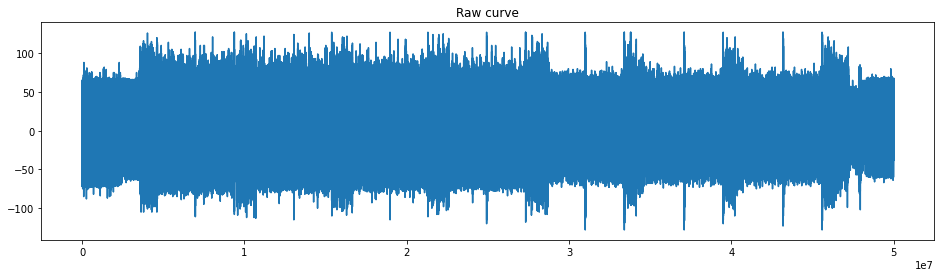

In [4]:
fig, ax = plt.subplots(1,1,figsize=[16,4])
ax.plot(curve)
ax.set_title("Raw curve")
plt.show()

The first step is to detect the 7 outer iterations.

> **IMPORTANT** You must have run the 'Outer-Iterations Detection' notebook before executing the following cells since it creates the pattern used for detecting iterations.

In [5]:
%%time
pattern = np.load(os.path.join(tmp_directory,'raw_outer_iteration_pattern.npy'))
decimation = 256
sos=butter(4, 0.01, output='sos')
# first we simplify curve and pattern to fasten the cross-correlation
preproc_pattern = simplify_pattern(pattern,decimation=decimation,sos=sos)
preproc_curve = simplify_pattern(curve,decimation=decimation,sos=sos)
pcc = pearson_xcorr(preproc_curve,preproc_pattern)
# (outer_starts[i],outer_starts[i+1]) are the boundings of the i-th iteration
outer_starts = detect_peaks(pcc, threshold=0.85, min_gap=2500, keep='max')
# since we computed the correlation on decimated curve we have to multiply the values we found by this decimation
# value to recover the indexes
outer_starts = decimation * np.array(outer_starts)

CPU times: user 24.7 s, sys: 1.82 s, total: 26.5 s
Wall time: 26.5 s


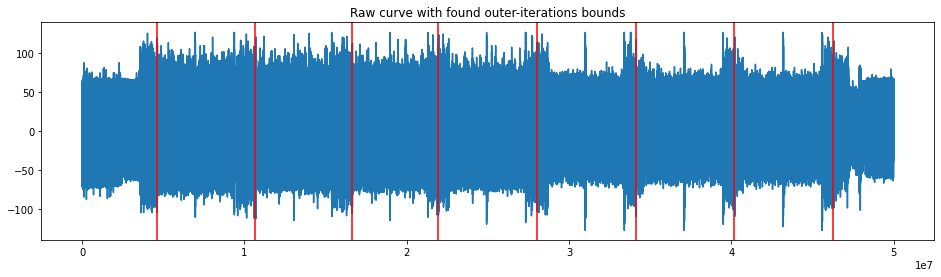

In [6]:
fig, ax = plt.subplots(1,1,figsize=[16,4])
ax.set_ylim(-140,140)
ax.plot(curve,zorder=1)
ax.vlines(outer_starts,ymin=-140,ymax=140,color='red',zorder=2)
ax.set_title("Raw curve with found outer-iterations bounds")
plt.show()

Then, we split outer-iterations in 142 inner-iterations each. Details are provided in the 'Inner-Iterations Detection' notebook

> **WORK IN PROGRESS** the remaining of the attack is not ready yet for being shared. We spend time to improve the speed of the analyses for the reader to be able to run the notebooks on a laptop in less than hours.